![QuantConnect Logo](https://cdn.quantconnect.com/web/i/logo-small.png)
# QuantConnect Alpha Streams
#### Licensed Under QuantConnect Platform Service Agreement v1.0. Copyright QuantConnect 2018.
#### For more information; see the Open API Specification of Alpha Streams: https://app.swaggerhub.com/apis/QuantConnect/Alpha/0.4

## Introduction

QuantConnect Alpha Streams allows quantiative funds to search a database of algorithm authors; and instantly license the authors' strategies (`Alpha`). The license agreements and fee structure is already prenegotiated, and the standardized backtesting and live trading infrastructure can give funds confidence in the algorithm results. Upon licensing an Alpha the insights/signals are instantly delivered to the fund in realtime.

## Terminology
 - `Alpha`     - Strategy for licensing.
 - `Author`    - QuantConnect member and creator of the Alpha. 
 - `Insight`   - Trade signal from an algorithm; consisting of an asset, direction, magnitude and confidence.
 - `Project`   - Properties of the project which submitted the `Alpha` 

## SDK Demonstration


### 1. Setup the SDK: Login with Client Credentials
We have written a full abstraction and SDK for the API which you can quickly import into your investment process. To start create a new instance of the `AlphaStreamClient` with your clientId and token.

In [1]:
# Import Python SDK Client Library 
from AlphaStreamClient import AlphaStreamClient 

# Define the clientId and API access token:
clientId    = "c7bd966e930c4b15b2ec13eb0d6170d9"
token       = "7030e89cfcc1948f4f93e91edd93d6f687c737844a6969d99d609a78f8d0a5c4091ef11f31c4c0e9cccacefe36ff4c2ad0e15525a85c65b0eafa34064cd11b1c"

# Create a new instance of the client module:
client = AlphaStreamClient(clientId, token)

### 2. Searching Alpha Strategies For Licensing
The primary aim of the Alpha Streams API is to quickly search for Alpha which matches your criteria. This criteria is unique to your fund and might include such aspects as: asset class, time horizon, risk adjusted return or market depth. Alpha Streams API aims to give you flexibility you need to locate suitable algorithms.

In [2]:
# Import Alpha Search Request Requirements
from Requests.SearchAlphasRequest import SearchAlphasRequest

# Define search criteria
projectId = 830918

# Submit Search:
alphas = client.SearchAlphas( projectId = projectId, sharedFeeMinimum = 1000 )

# Display some information on the algorithms:
for a in alphas:
    print("Alpha: id: {} Project: '{}' Fee: ${:,.2f}/mo".format(a.Id, a.Project.Name, a.SharedSubscriptionFee))

Alpha: id: 6994413727d90645478ddb397 Project: '2 JET STONE - BTC Forever Up' Fee: $9,999.00/mo
Alpha: id: 75580dfb66b941036344fc561 Project: '2 JET STONE - BTC Forever Up' Fee: $99,999.00/mo
Alpha: id: b4764d68a792fc4654d910516 Project: '2 JET STONE - BTC Forever Up' Fee: $51,651,321.00/mo
Alpha: id: c723b49e01a452e308af7362f Project: '2 JET STONE - BTC Forever Up' Fee: $99,999.00/mo


### 3. Pull Information on an Alpha By Specific AlphaId
You can fetch information on an alpha by its associated id with the `/alpha/{id}` API endpoint.

In [3]:
# Prospective / Test Alpha Id:
alphaId = "623b06b231eb1cc1aa3643a46"
alpha = client.GetAlphaById( alphaId )

# Print out the Alpha data:
print( "Alpha Matched Id: \n\t id: {} \n\t Project: {} \n\t ExclusiveAvailable: {} \n\t Listed: {} ".
      format(alpha.Id, alpha.Project.Name, alpha.ExclusiveAvailable, alpha.ListedDate) )

Alpha Matched Id: 
	 id: 623b06b231eb1cc1aa3643a46 
	 Project: Basic/Clone of: CSharp Framework 
	 ExclusiveAvailable: True 
	 Listed: 2018-03-11 08:33:48 


### 4. Get Last 5 Insights of an Alpha
All historical insights of an Alpha are recorded in a database. Insights are generated `in sample`, `out of sample` or in `live trading`. Using these insights you can perform your own backtests with your own fill and slippage models to see how the strategy would have performed with your execution.

In [4]:
# Import the Insights Request Class:
from Requests.GetAlphaInsightsRequest import GetAlphaInsightsRequest

# Request Insights for the Previously Alpha
insights = client.GetAlphaInsights( alphaId, start = 600000 )

# Take Top 5:
for i in insights[:10]:
    print( "{} Alpha {} {} insight for {:<10} going {} by {:.2%} over the next {}s".format(i.Created, i.Source, i.Type, i.Ticker, i.Direction, i.Magnitude, i.Period) )

2018-03-15 10:00:06.000200 Alpha live trading price insight for FB         going up by 2.50% over the next 5s
2018-03-15 10:00:06.000200 Alpha live trading price insight for IBM        going up by 2.50% over the next 5s
2018-03-15 10:00:06.000200 Alpha live trading price insight for LTCBTC     going up by 2.50% over the next 5s
2018-03-15 10:00:06.000200 Alpha live trading price insight for LTCUSD     going up by 2.50% over the next 5s
2018-03-15 10:00:06.000200 Alpha live trading price insight for MSFT       going up by 2.50% over the next 5s
2018-03-15 10:00:06.000200 Alpha live trading price insight for SPY        going up by 2.50% over the next 5s
2018-03-15 10:00:11.001100 Alpha live trading price insight for AAPL       going up by 2.50% over the next 5s
2018-03-15 10:00:11.001100 Alpha live trading price insight for BTCUSD     going up by 2.50% over the next 5s
2018-03-15 10:00:11.001100 Alpha live trading price insight for ETHBTC     going up by 2.50% over the next 5s
2018-03-15

### 5. Seach Alpha Streams by Author Details
Knowing who created the Alpha can be an important search tool to improve your filtering. Participating Author information can be searched in a similar manner to the Alpha Search. Each supplied criteria is a logical AND on the query.


In [15]:
languages = ["Py"]

authors = client.SearchAuthors( languages = languages, location = "New York" )

print("Located {} authors matching your criteria.".format(len(authors)))

for a in authors[:5]:
    print("Alpha Stream Author {:>5} is from {}. Signed up {} and codes in {}".format( a.Id[:5], a.Location, a.SignUpTime, a.Language) )

Located 3 authors matching your criteria.
Alpha Stream Author 1675c is from New York, New York, US. Signed up 2018-01-30 23:50:50 and codes in Py
Alpha Stream Author 1aed0 is from Brooklyn, New York, US. Signed up 2017-11-27 23:35:08 and codes in Py
Alpha Stream Author 1ba2f is from Brooklyn, New York, US. Signed up 2017-11-27 23:35:08 and codes in Py


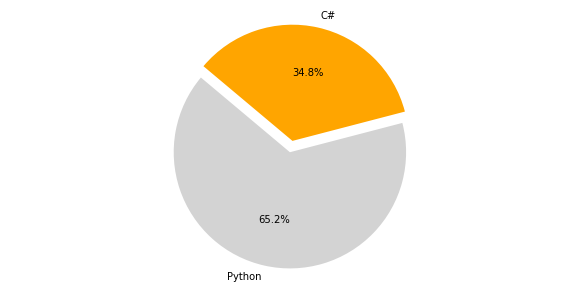

In [16]:
import matplotlib.pyplot as plt
sizes = [len(client.SearchAuthors( languages = "Py")), len(client.SearchAuthors( languages = "C#"))]
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=(0.1, 0), labels= ['Python', 'C#'], colors=['lightgrey', 'orange'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### 6. Fetch Detailed Information on a Specific Author
The API allows you to fetch detailed information on a specific author by the hash-id.

In [12]:
# Author to fetch profile information about:
authorId = "1f48359f6c6cbad65b091232eaae73ce"

# Submit request for more information:
author = client.GetAuthorByIdRequest(authorId)

# Print out the Alpha data:
print( "Author Matched Id: \n\t id: {} \n\t Biography: {}... \n\t Projects: {} \n\t Language: {} \n\t Signed Up: {} \n\t Location: {} ".
      format(author.Id[:5], author.Biography[:50], author.Projects, author.Language, author.SignUpTime, author.Location ) )

Author Matched Id: 
	 id: 1f483 
	 Biography: I'm part of the QuantConnect Engineering team. I h... 
	 Projects: 224 
	 Language: C# 
	 Signed Up: 2015-03-28 20:10:29 
	 Location: Mountain View, California, US 


### 7. Subscribing and Unsubscribing from An Alpha
Once you've located an Alpha you need to subscribe to it to recieve its streaming insights. Alphas have a monthly licensing fee which is engaged once you request its signals. There is a minimum fee equivalent to 7 days of licensing from an Alpha. Sending a subscription request starts delivery of the signals to the fund-exchange.

In [8]:
# Alpha to subscribe to:
alphaId = "623b06b231eb1cc1aa3643a46"

unsubscribeResult = client.Unsubscribe( alphaId )
print("Stopped Subscription to {}: {}".format(alphaId, unsubscribeResult))

Stopped Subscription to 623b06b231eb1cc1aa3643a46: True


In [9]:
subscribeResult = client.Subscribe( alphaId )
print("Started Subscription to {}: {}".format(alphaId, subscribeResult))

Started Subscription to 623b06b231eb1cc1aa3643a46: True


### 8. Stream Insights from An Alpha
Finally once analysed and subscribed to an Alpha - you can pull down the individual insights with the streaming socket connection. This is to use the insights in realtime in your fund management.

In [10]:
# Import the streaming client helper library
from AlphaInsightsStreamClient import AlphaInsightsStreamClient

# Configure authentication details
ipaddress = "35.231.13.1"
user = "demo-api"
password = "demo"
virtualhost = "demo-client"
exchange = "QCAlphaExchange_Demo-Client"
queueName = alphaId
routingKey = alphaId

# Create the streaming client tool:
streamClient = AlphaInsightsStreamClient(user, password, ipaddress, virtualhost, exchange)

print("Streaming insights for 5 seconds... ")

# StreamSynchronously pulls down Insights for a minimum timeout in a blocking manner.
for i in streamClient.StreamSynchronously( alphaId, timeout=10 ):
    print( "{} Alpha {} {} insight for {:<10} going {} by {:.2%} over the next {}s".format(i.Created, i.Source, i.Type, i.Ticker, i.Direction, i.Magnitude, i.Period) )

print("Streaming completed.")
    

Streaming insights for 5 seconds... 
2018-03-21 20:38:31.000723 Alpha live trading price insight for AAPL       going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for BTCUSD     going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for ETHBTC     going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for ETHUSD     going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for FB         going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for IBM        going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for LTCBTC     going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for LTCUSD     going up by 2.50% over the next 5.0s
2018-03-21 20:38:31.000723 Alpha live trading price insight for MSF